# EP-LHb-RNN

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from EPLHb import EPLHb, gd, adam

import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# rcParams['figure.figsize'] = [20, 4]
# rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [2]:
#@title Downloading MNIST data

train_data = datasets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = datasets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

#@title Loading the data
batch_size = 100 # the size of input data took for one iteration

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = False)

## Train RNN model

In [3]:
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 100 # number of nodes at hidden layer
output_size = 10 # number of output classes discrete range [0,9]
num_epochs = 5 # 20 # number of times which the entire dataset is passed throughout the model
lr = 1e-3 # size of step

In [4]:
corelease_net = EPLHb(input_size,hidden_size,output_size,
                      fixed_sign=False,rnn=True,real_circuit=True)
if torch.cuda.is_available(): corelease_net.cuda()

# Initalize training details
loss_function = nn.CrossEntropyLoss()
# optimizer = gd(net.parameters(), lr=lr)
optimizer = adam(corelease_net.parameters(), lr=lr)
cr_training_loss = []
cr_test_accuracy = []

LHb_RNN.weight_ih_l0
 Positive: 50.07270574569702%; Negative: 49.92729723453522%; Zero: 0.0%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 54.00000214576721%; Negative: 46.00000083446503%; Zero: 0.0%
LHb_RNN.bias_hh_l0
 Positive: 52.99999713897705%; Negative: 46.99999988079071%; Zero: 0.0%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 100.0%; Zero: 0.0%
LHb_to_DAN.bias
 Positive: 30.000001192092896%; Negative: 69.9999988079071%; Zero: 0.0%


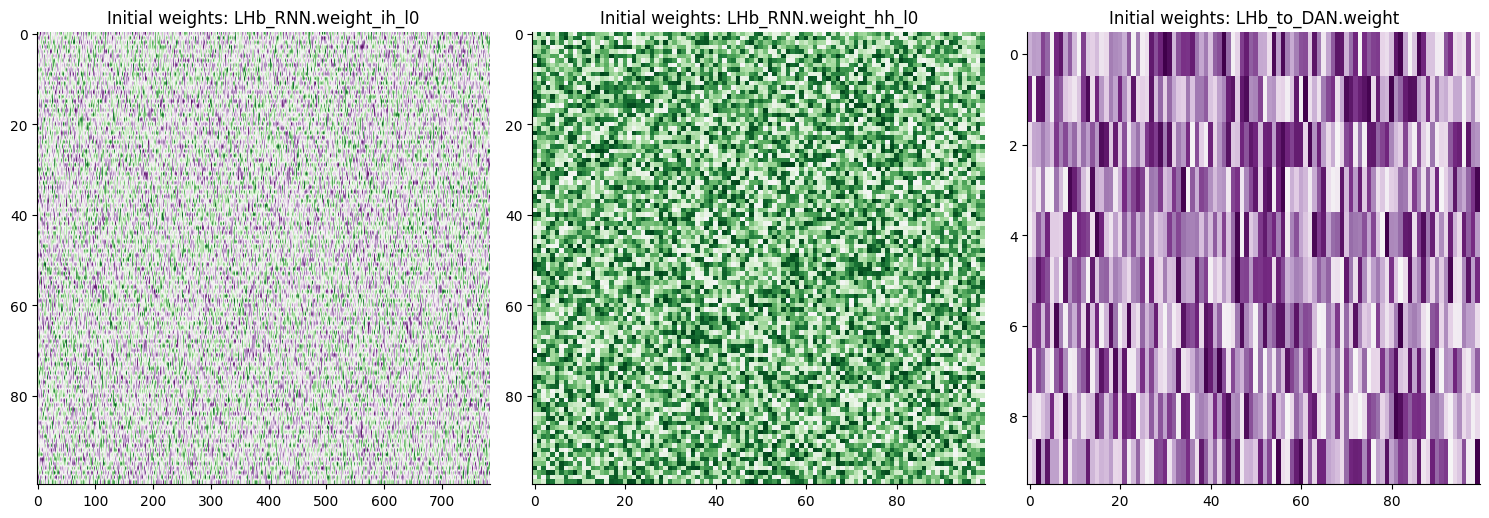

In [5]:
# Save the initial weights
initial_params_corelease = corelease_net.record_params()

# Plot initialized weights
fig, axs = plt.subplots(1,int(len(initial_params_corelease)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in initial_params_corelease.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Initial weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

Epoch [1/5], Iteration: 0, Loss: 2.2826, Accuracy: 18.2000
Epoch [1/5], Iteration: 100, Loss: 1.1640, Accuracy: 86.3000
Epoch [1/5], Iteration: 200, Loss: 1.1059, Accuracy: 89.8200
Epoch [1/5], Iteration: 300, Loss: 1.0277, Accuracy: 90.8100
Epoch [1/5], Iteration: 400, Loss: 0.9993, Accuracy: 91.4900
Epoch [1/5], Iteration: 500, Loss: 1.0309, Accuracy: 92.2100
Epoch [2/5], Iteration: 0, Loss: 1.0124, Accuracy: 92.2200
Epoch [2/5], Iteration: 100, Loss: 0.9208, Accuracy: 92.7800
Epoch [2/5], Iteration: 200, Loss: 0.9130, Accuracy: 93.0200
Epoch [2/5], Iteration: 300, Loss: 0.9066, Accuracy: 93.4000
Epoch [2/5], Iteration: 400, Loss: 0.9542, Accuracy: 93.4400
Epoch [2/5], Iteration: 500, Loss: 0.9280, Accuracy: 93.5900
Epoch [3/5], Iteration: 0, Loss: 0.8778, Accuracy: 94.0700
Epoch [3/5], Iteration: 100, Loss: 0.8475, Accuracy: 94.3300
Epoch [3/5], Iteration: 200, Loss: 0.8487, Accuracy: 94.2600
Epoch [3/5], Iteration: 300, Loss: 0.8833, Accuracy: 94.4700
Epoch [3/5], Iteration: 400, L

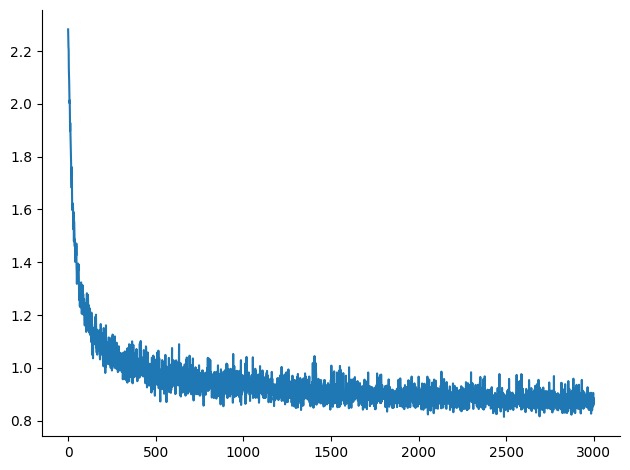

In [6]:
# Train the network
training_loss, test_accuracy = corelease_net.train_model(num_epochs,train_loader,optimizer,loss='CrossEntropyLoss',
                                          test_loader=test_loader,print_epoch=True)
cr_training_loss.extend(training_loss)
cr_test_accuracy.extend(test_accuracy)

# Plot training loss
plt.plot(cr_training_loss)

LHb_RNN.weight_ih_l0
 Positive: 56.34821653366089%; Negative: 43.65178644657135%; Zero: 0.0%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 64.99999761581421%; Negative: 34.99999940395355%; Zero: 0.0%
LHb_RNN.bias_hh_l0
 Positive: 66.00000262260437%; Negative: 34.00000035762787%; Zero: 0.0%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 89.20000195503235%; Zero: 10.80000028014183%
LHb_to_DAN.bias
 Positive: 10.000000149011612%; Negative: 89.99999761581421%; Zero: 0.0%


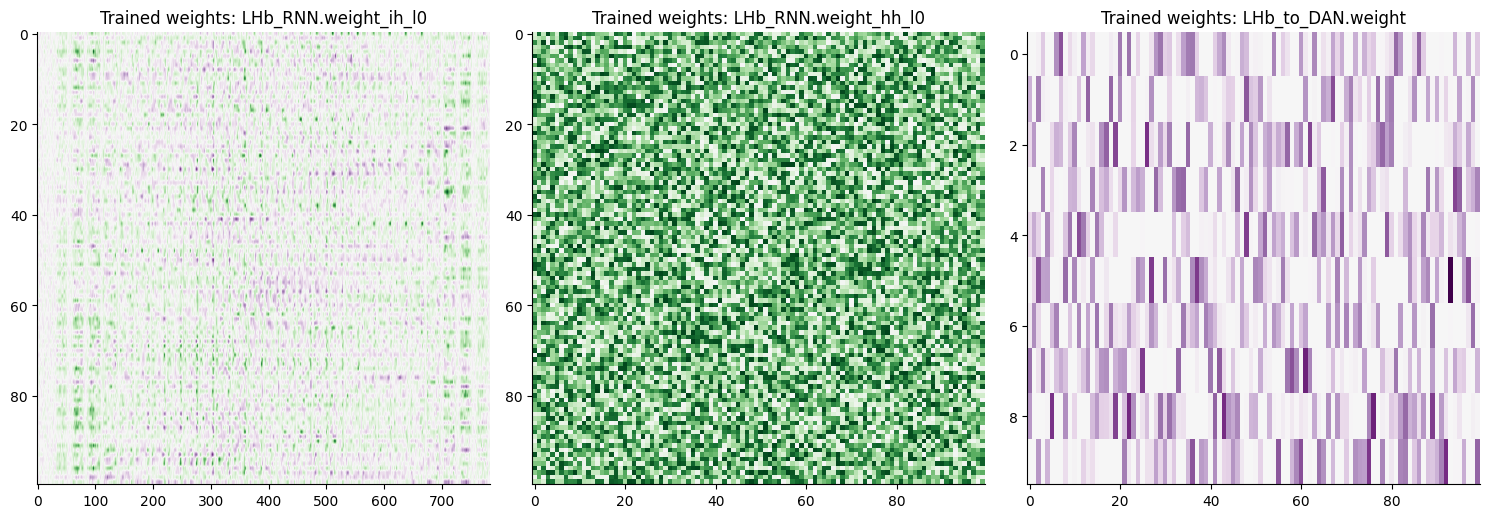

In [7]:
# Save the trianed parameters in paramList
trained_params_corelease = corelease_net.record_params()

# Plot initialized weights
fig, axs = plt.subplots(1,int(len(trained_params_corelease)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in trained_params_corelease.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Trained weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

LHb_RNN.weight_ih_l0 flipped:  29.760% (23332/78400)
LHb_RNN.weight_hh_l0 flipped:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 flipped:  35.000% (35/100)
LHb_RNN.bias_hh_l0 flipped:  33.000% (33/100)
LHb_to_DAN.weight flipped:  0.000% (0/1000)
LHb_to_DAN.bias flipped:  40.000% (4/10)
LHb_RNN.weight_ih_l0 changed:  91.454% (71700/78400)
LHb_RNN.weight_hh_l0 changed:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 changed:  100.000% (100/100)
LHb_RNN.bias_hh_l0 changed:  100.000% (100/100)
LHb_to_DAN.weight changed:  100.000% (1000/1000)
LHb_to_DAN.bias changed:  100.000% (10/10)


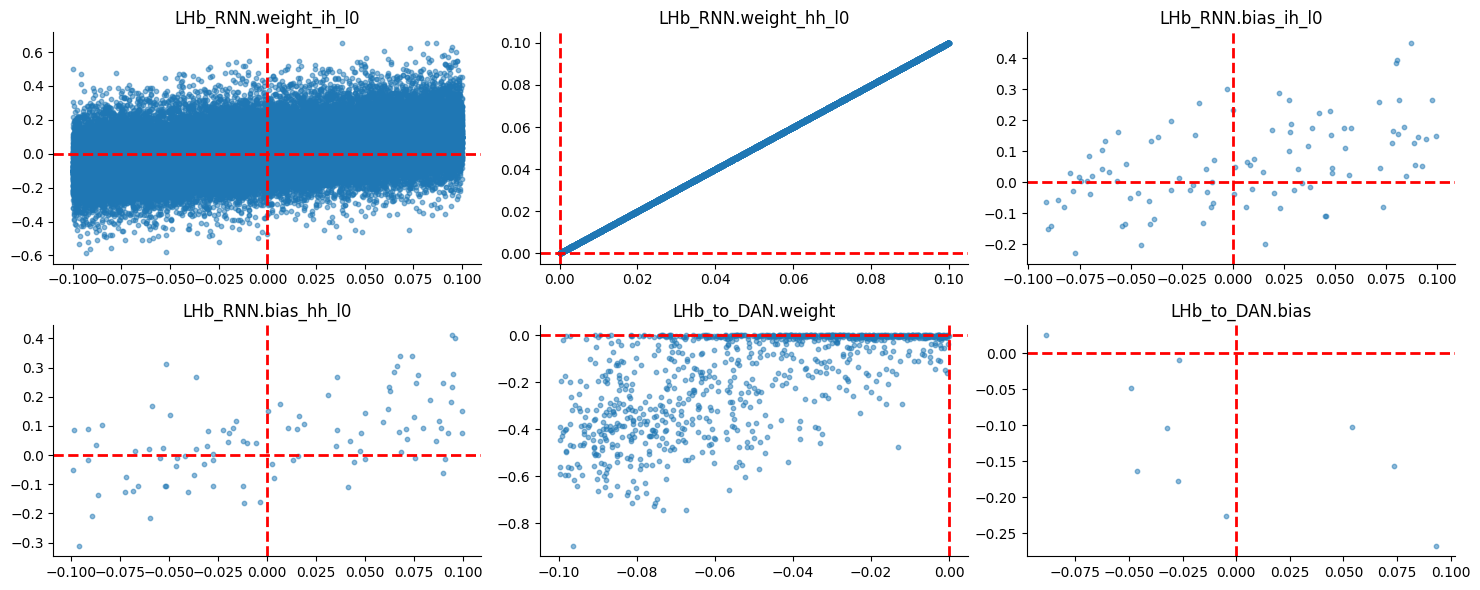

In [8]:
#@title What fraction of parameters flip sign?
for key in initial_params_corelease:
    n_weights=initial_params_corelease[key].numel()
    n_flip = (initial_params_corelease[key].sign()*trained_params_corelease[key].sign()<0).count_nonzero().item()
    print(key + ' flipped: % .3f%% (%d/%d)' %(100*n_flip/n_weights, n_flip, n_weights))

for key in initial_params_corelease:
    n_weights=initial_params_corelease[key].numel()
    n_changed = (initial_params_corelease[key] != trained_params_corelease[key]).count_nonzero().item()
    print(key + ' changed: % .3f%% (%d/%d)' %(100*n_changed/n_weights, n_changed, n_weights))

# Plot initial vs trained values

fig, axs = plt.subplots(2,int(len(trained_params_corelease)/2),figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

ax = 0
for i, ax in enumerate(axs.flatten()):
    key = list(initial_params_corelease)[i]
    ax.scatter(initial_params_corelease[key].numpy(),trained_params_corelease[key].numpy(),s=10,alpha=0.5)
    ax.axhline(y=0, linewidth=2, color = 'r', ls='--')
    ax.axvline(x=0, linewidth=2, color = 'r', ls='--')
    ax.set_title(key)

plt.tight_layout()
plt.show()

## Fixed sign RNN model

In [9]:
fixed_sign_net = EPLHb(input_size,hidden_size,output_size,
                       rnn=True,fixed_sign=True,real_circuit=True)
if torch.cuda.is_available(): fixed_sign_net.cuda()

# Initalize training details
loss_function = nn.CrossEntropyLoss()
# optimizer = gd(fixed_sign_model.parameters(), lr=lr, fixed_sign=True)
fs_optimizer = adam(fixed_sign_net.parameters(), lr=lr, fixed_sign=True)
fs_training_loss = []
fs_test_accuracy = []

LHb_RNN.weight_ih_l0
 Positive: 51.02040767669678%; Negative: 48.97959232330322%; Zero: 0.0%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 55.000001192092896%; Negative: 44.999998807907104%; Zero: 0.0%
LHb_RNN.bias_hh_l0
 Positive: 54.00000214576721%; Negative: 46.00000083446503%; Zero: 0.0%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 100.0%; Zero: 0.0%
LHb_to_DAN.bias
 Positive: 40.00000059604645%; Negative: 60.00000238418579%; Zero: 0.0%


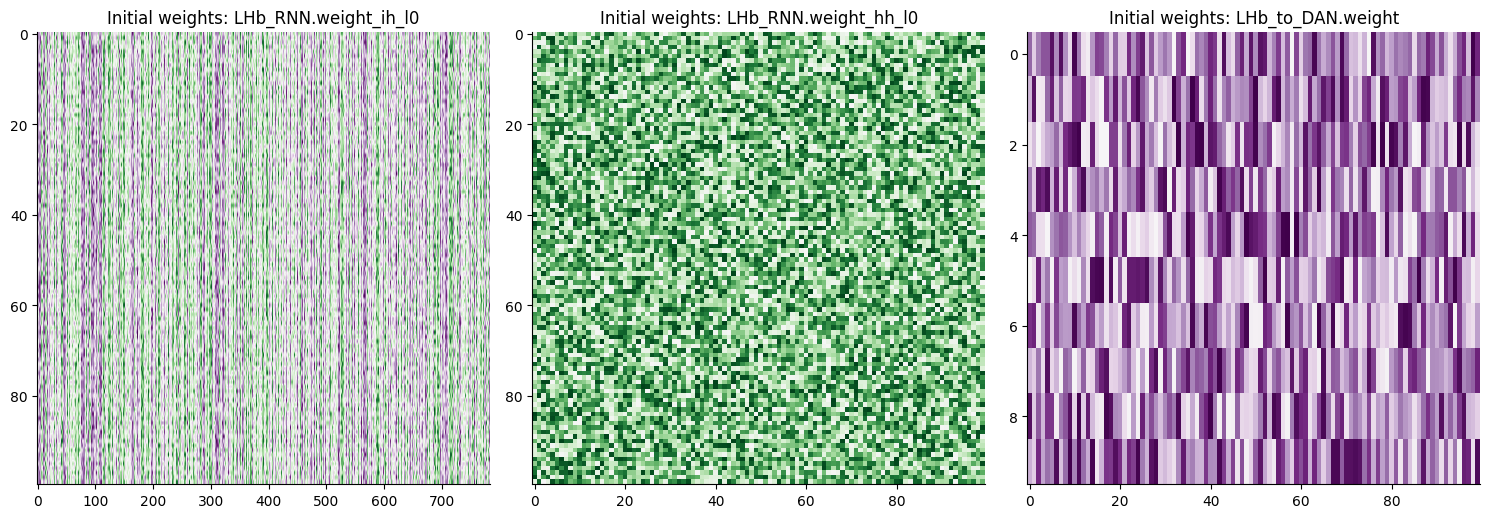

In [10]:
# Save the initial weights
initial_params_fixed = fixed_sign_net.record_params()

# Plot initialized weights
fig, axs = plt.subplots(1,int(len(initial_params_fixed)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in initial_params_fixed.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Initial weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

In [11]:
# Train the network
training_loss, test_accuracy = fixed_sign_net.train_model(num_epochs,train_loader,fs_optimizer,loss='CrossEntropyLoss',
                                           test_loader=test_loader,print_epoch=True)
fs_training_loss.extend(training_loss)
fs_test_accuracy.extend(test_accuracy)

Epoch [1/5], Iteration: 0, Loss: 2.3019, Accuracy: 13.2600
Epoch [1/5], Iteration: 100, Loss: 1.3275, Accuracy: 79.9300
Epoch [1/5], Iteration: 200, Loss: 1.1574, Accuracy: 88.2700
Epoch [1/5], Iteration: 300, Loss: 1.1788, Accuracy: 90.1600
Epoch [1/5], Iteration: 400, Loss: 1.0476, Accuracy: 90.8200
Epoch [1/5], Iteration: 500, Loss: 1.0512, Accuracy: 91.1400
Epoch [2/5], Iteration: 0, Loss: 0.9992, Accuracy: 91.7700
Epoch [2/5], Iteration: 100, Loss: 0.9866, Accuracy: 92.1500
Epoch [2/5], Iteration: 200, Loss: 0.9587, Accuracy: 92.5000
Epoch [2/5], Iteration: 300, Loss: 0.9584, Accuracy: 92.6100
Epoch [2/5], Iteration: 400, Loss: 1.0111, Accuracy: 92.7600
Epoch [2/5], Iteration: 500, Loss: 1.0212, Accuracy: 92.9100
Epoch [3/5], Iteration: 0, Loss: 0.9525, Accuracy: 93.2100
Epoch [3/5], Iteration: 100, Loss: 0.9286, Accuracy: 93.1900
Epoch [3/5], Iteration: 200, Loss: 0.9688, Accuracy: 93.4800
Epoch [3/5], Iteration: 300, Loss: 0.9714, Accuracy: 93.6300
Epoch [3/5], Iteration: 400, L

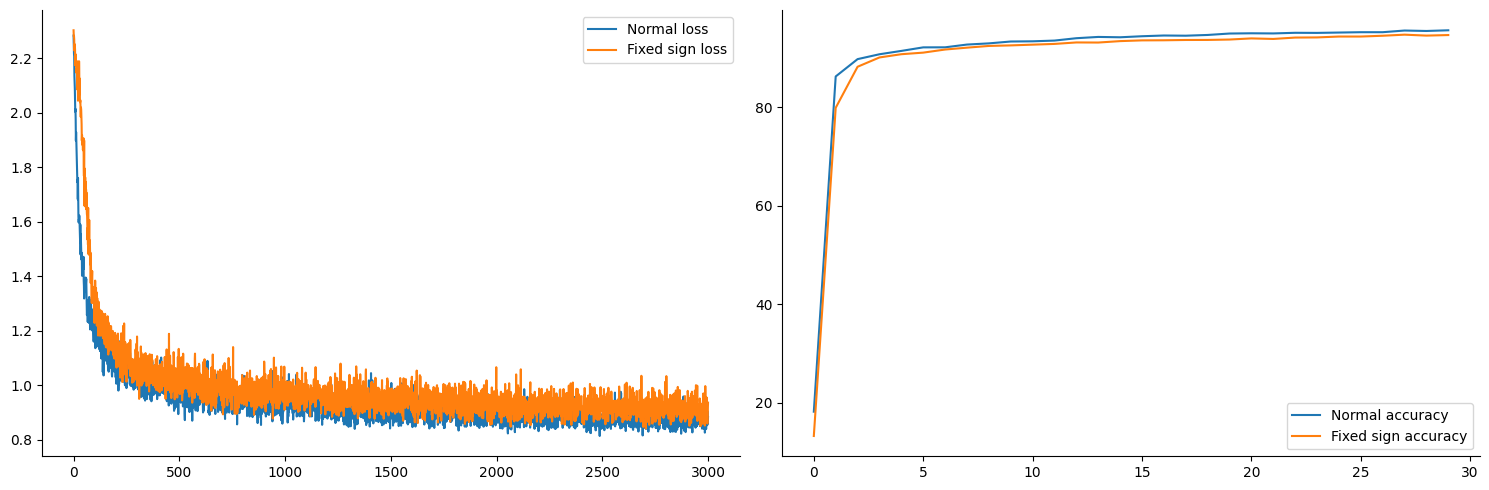

In [12]:
# Plot training loss history
# plt.plot(cr_training_loss, label='Normal loss')
# plt.plot(fs_training_loss, label='Fixed sign loss')
# plt.legend()

fig, axs = plt.subplots(1,2,figsize=(15, 5))
axs[0].plot(cr_training_loss, label='Normal loss')
axs[0].plot(fs_training_loss, label='Fixed sign loss')
axs[0].legend()
axs[1].plot(cr_test_accuracy, label='Normal accuracy')
axs[1].plot(fs_test_accuracy, label='Fixed sign accuracy')
axs[1].legend()

LHb_RNN.weight_ih_l0
 Positive: 46.93495035171509%; Negative: 38.79081606864929%; Zero: 14.27423506975174%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 52.99999713897705%; Negative: 37.99999952316284%; Zero: 9.000000357627869%
LHb_RNN.bias_hh_l0
 Positive: 50.0%; Negative: 43.00000071525574%; Zero: 7.000000029802322%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 74.09999966621399%; Zero: 25.90000033378601%
LHb_to_DAN.bias
 Positive: 30.000001192092896%; Negative: 60.00000238418579%; Zero: 10.000000149011612%


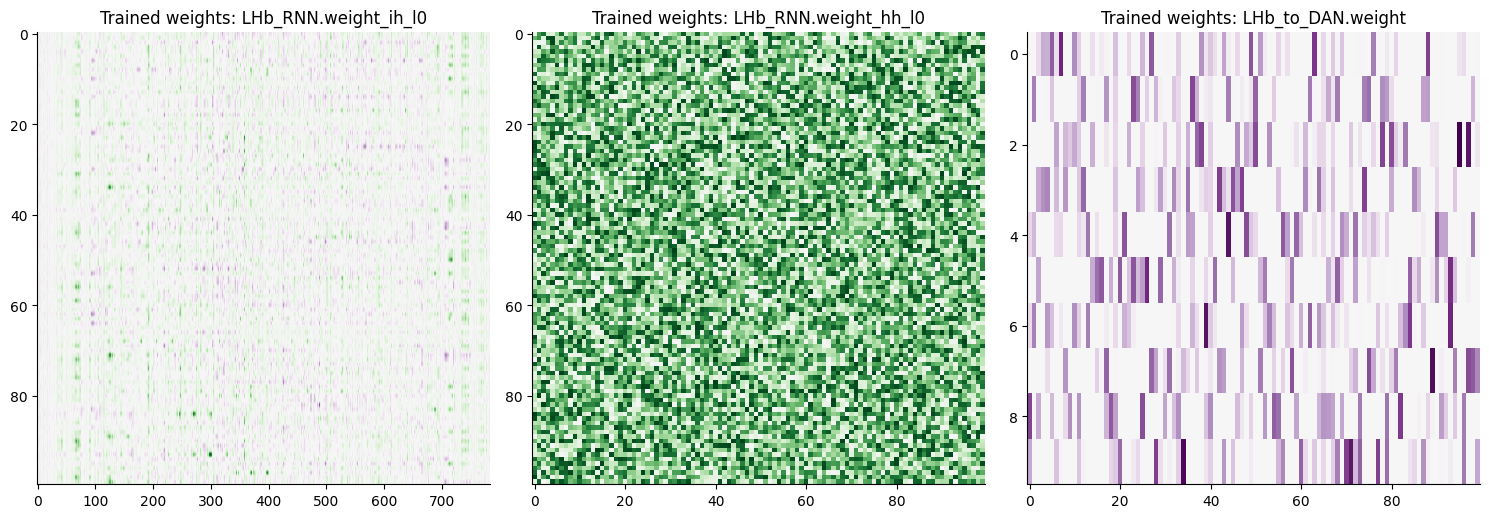

In [13]:
# Save the trianed parameters in paramList
trained_params_fixed = fixed_sign_net.record_params()
# Plot initialized weights
fig, axs = plt.subplots(1,int(len(initial_params_fixed)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in trained_params_fixed.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Trained weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

LHb_RNN.weight_ih_l0 flipped:  0.000% (0/78400)
LHb_RNN.weight_hh_l0 flipped:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 flipped:  0.000% (0/100)
LHb_RNN.bias_hh_l0 flipped:  0.000% (0/100)
LHb_to_DAN.weight flipped:  0.000% (0/1000)
LHb_to_DAN.bias flipped:  0.000% (0/10)
LHb_RNN.weight_ih_l0 changed:  91.454% (71700/78400)
LHb_RNN.weight_hh_l0 changed:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 changed:  100.000% (100/100)
LHb_RNN.bias_hh_l0 changed:  100.000% (100/100)
LHb_to_DAN.weight changed:  100.000% (1000/1000)
LHb_to_DAN.bias changed:  100.000% (10/10)


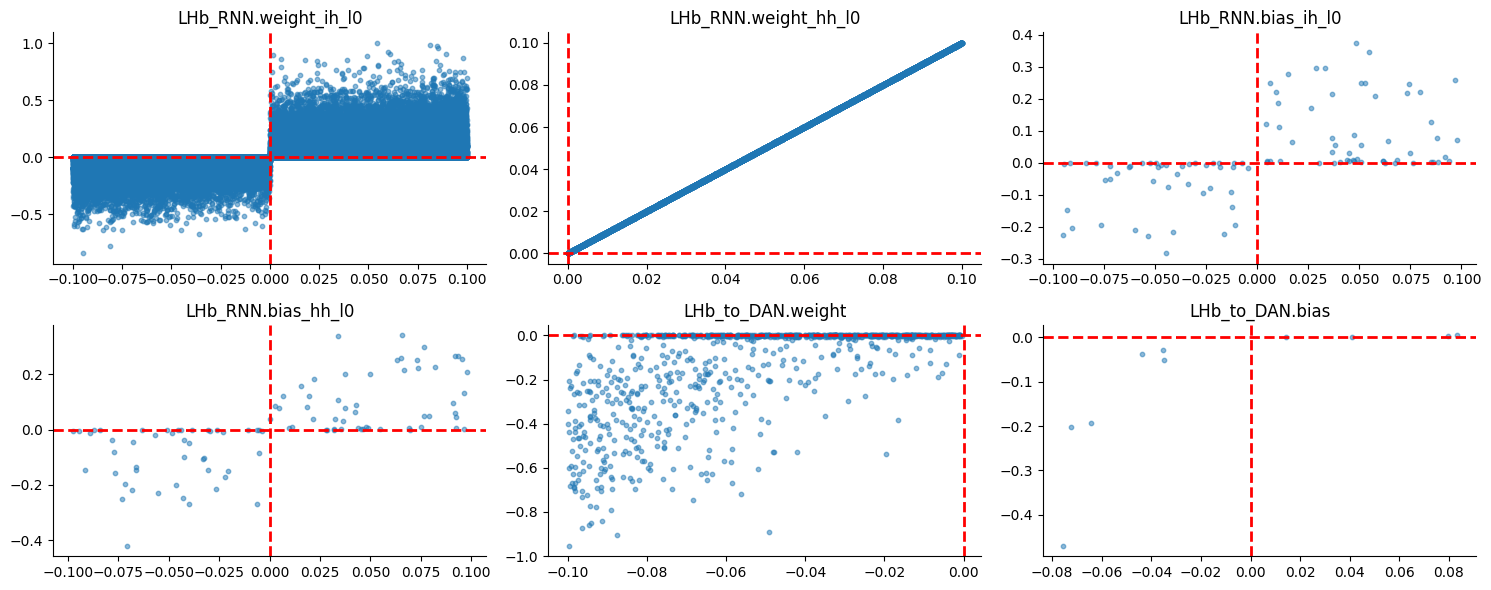

In [14]:
#@title What fraction of parameters flip sign?
for key in initial_params_fixed:
    n_weights=initial_params_fixed[key].numel()
    n_flip = (initial_params_fixed[key].sign()*trained_params_fixed[key].sign()<0).count_nonzero().item()
    print(key + ' flipped: % .3f%% (%d/%d)' %(100*n_flip/n_weights, n_flip, n_weights))

for key in initial_params_fixed:
    n_weights=initial_params_fixed[key].numel()
    n_changed = (initial_params_fixed[key] != trained_params_fixed[key]).count_nonzero().item()
    print(key + ' changed: % .3f%% (%d/%d)' %(100*n_changed/n_weights, n_changed, n_weights))

# Plot initial vs trained values

fig, axs = plt.subplots(2,int(len(trained_params_fixed)/2),figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

ax = 0
for i, ax in enumerate(axs.flatten()):
    key = list(initial_params_fixed)[i]
    ax.scatter(initial_params_fixed[key].numpy(),trained_params_fixed[key].numpy(),s=10,alpha=0.5)
    ax.axhline(y=0, linewidth=2, color = 'r', ls='--')
    ax.axvline(x=0, linewidth=2, color = 'r', ls='--')
    ax.set_title(key)

plt.tight_layout()
plt.show()

## Weight change analysis

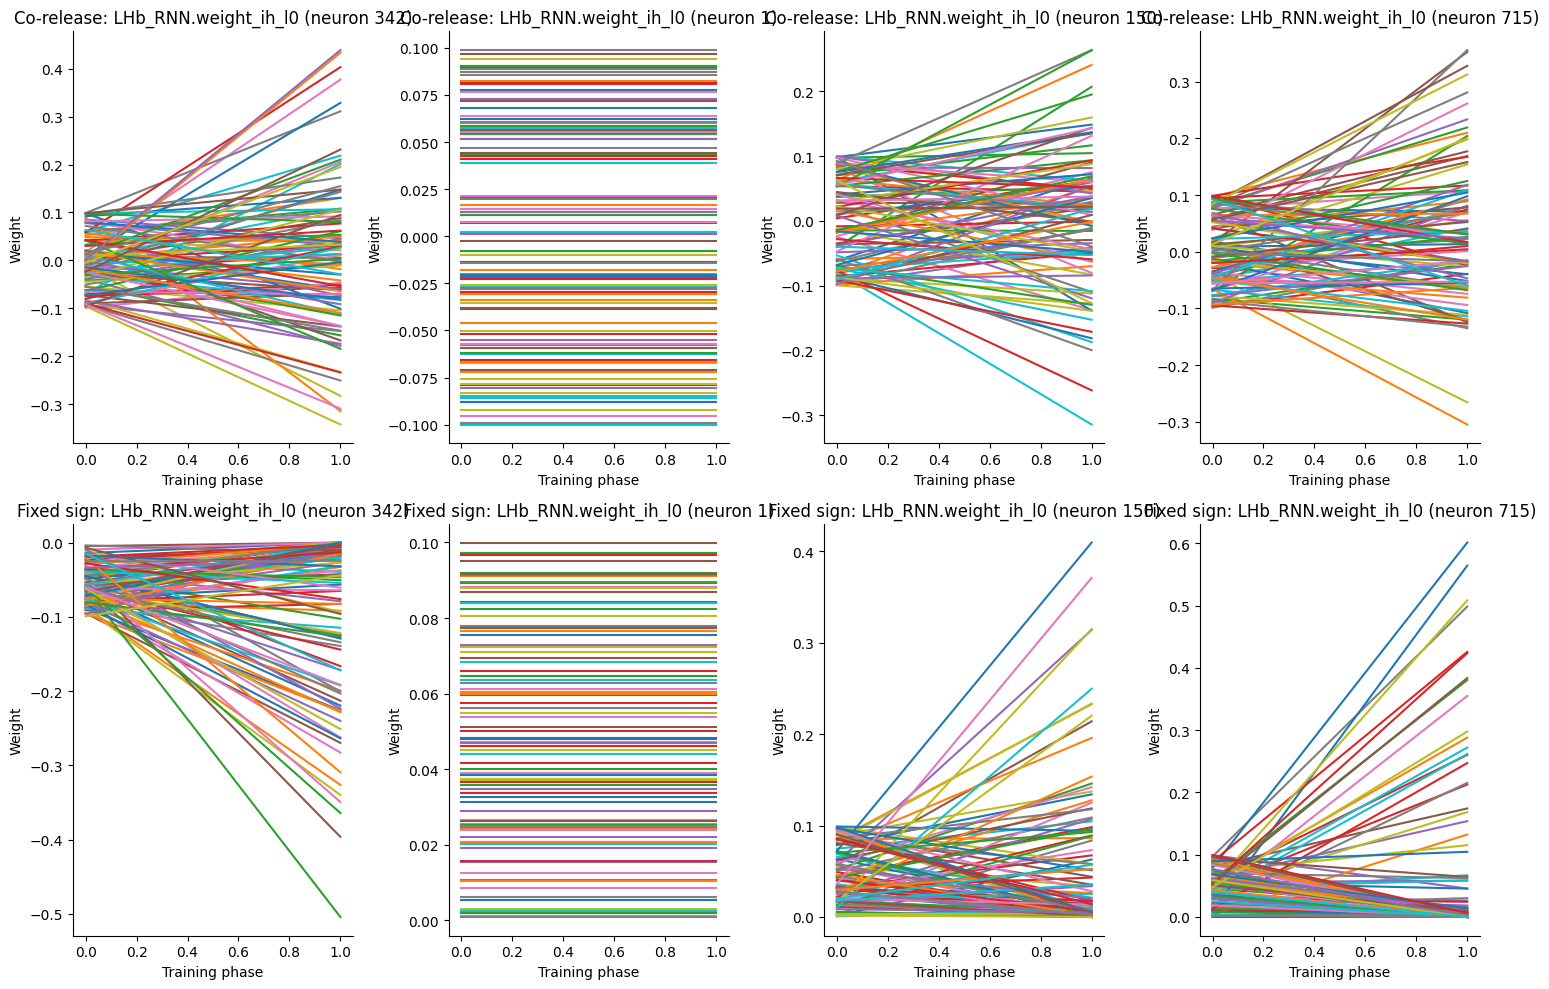

In [15]:
# Plot flipped EP neuron weight changes
n_row = 2
n_col = 4

fig, axs = plt.subplots(n_row,n_col,figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

key = list(initial_params_corelease)[0]
picked_neurons = torch.randint(1,input_size,(n_col,))

for i, neuron in enumerate(picked_neurons):
    weight_history_corelease = [initial_params_corelease[key][:,neuron].flatten(),
                                trained_params_corelease[key][:,neuron].flatten()]

    weight_history_fixed = [initial_params_fixed[key][:,neuron].flatten(),
                            trained_params_fixed[key][:,neuron].flatten()]

    axs.flatten()[i].plot(weight_history_corelease)
    axs.flatten()[i].set_xlabel('Training phase')
    axs.flatten()[i].set_ylabel('Weight')
    axs.flatten()[i].set_title('Co-release: %s (neuron %d)' %(key, neuron))
    axs.flatten()[i+n_col].plot(weight_history_fixed)
    axs.flatten()[i+n_col].set_xlabel('Training phase')
    axs.flatten()[i+n_col].set_ylabel('Weight')
    axs.flatten()[i+n_col].set_title('Fixed sign: %s (neuron %d)' %(key, neuron))

plt.tight_layout()
plt.show()

## Train multiple networks per condition

Different initialization scenarios
- random initialization of every synapses
- Dale's law initialization of every synapses

Different network structure
- LHb to DAN is all inhibitory + LHb to LHb is all excitatory (if RNN)
- Every layer have mixed excitatory/inhibitory output

Different update methods
- Normal ADAM
- Fixed sign ADAM

In [16]:
EP_size = 784 # img_size = (28,28) ---> 28*28=784 in total
LHb_size = 100 # number of nodes at hidden layer
DAN_size = 10 # number of output classes discrete range [0,9]
num_epochs = 10 # 20 # number of times which the entire dataset is passed throughout the model
lr = 1e-3 # size of step

prob_EP_to_LHb = 1
prob_LHb_to_LHb = 1
prob_LHb_to_DAN = 1

n_networks = 2 # number of networks to train

### Train multiple co-release models

In [17]:
cr_training_loss_summary = []
cr_test_accuracy_summary = []

for i in range(1,n_networks+1):
    # Initialize a network
    net = EPLHb(EP_size,LHb_size,DAN_size,
                rnn=True,fixed_sign=False,real_circuit=True,
                prob_EP_to_LHb=prob_EP_to_LHb,prob_LHb_to_LHb=prob_LHb_to_LHb,prob_LHb_to_DAN=prob_LHb_to_DAN)
    initial_params = net.record_params(calc_sign=False)
    net_training_loss = []
    net_test_accuracy = []
    if torch.cuda.is_available(): net.cuda()

    # Train on original data
    optimizer = adam(net.parameters(), lr=lr, fixed_sign=False)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    training_loss, test_accuracy = net.train_model(num_epochs,train_loader,optimizer,
                                    test_loader=test_loader,print_epoch=False,loss='CrossEntropyLoss')
    net_training_loss.extend(training_loss)
    net_test_accuracy.extend(test_accuracy)

    # Train on flipped data
    # optimizer = adam(net.parameters(), lr=lr, fixed_sign=False)
    # training_loss = net.train_model(num_epochs,flip_loader,optimizer,print_epoch=False)
    # net_training_loss.extend(training_loss)

    cr_training_loss_summary.append(net_training_loss)
    cr_test_accuracy_summary.append(net_test_accuracy)
    print('Finished training co-release network %d/%d' %(i,n_networks))

# Convert list to numpy array
cr_training_loss_summary = np.array(cr_training_loss_summary)
cr_test_accuracy_summary = np.array(cr_test_accuracy_summary)

# # Plot training loss for all network separately
# fig, axs = plt.subplots(n_networks,1,figsize=(15,3*n_networks))
# for i, ax in enumerate(axs.flatten()):
#     ax.plot(cr_training_loss_summary[i])
#     ax.set_title('Corelease # %d' %(i+1))

Finished training co-release network 1/2
Finished training co-release network 2/2


### Train multiple fixed sign models

In [18]:
fs_training_loss_summary = []
fs_test_accuracy_summary = []

for i in range(1,n_networks+1):
    # Initialize a network
    net = EPLHb(EP_size,LHb_size,DAN_size,
                rnn=True,fixed_sign=True,real_circuit=True,
                prob_EP_to_LHb=prob_EP_to_LHb,prob_LHb_to_LHb=prob_LHb_to_LHb,prob_LHb_to_DAN=prob_LHb_to_DAN)
    initial_params = net.record_params(calc_sign=False)
    net_training_loss = []
    net_test_accuracy = []
    if torch.cuda.is_available(): net.cuda()

    # Train on original data
    optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    training_loss, test_accuracy = net.train_model(num_epochs,train_loader,optimizer,
                                    test_loader=test_loader,print_epoch=False,loss='CrossEntropyLoss')
    net_training_loss.extend(training_loss)
    net_test_accuracy.extend(test_accuracy)

    # Train on flipped data
    # optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # training_loss = net.train_model(num_epochs,flip_loader,optimizer,print_epoch=False)
    # net_training_loss.extend(training_loss)

    fs_training_loss_summary.append(net_training_loss)
    fs_test_accuracy_summary.append(net_test_accuracy)
    print('Finished training fixed sign network %d/%d' %(i,n_networks))

# Convert list to numpy array
fs_training_loss_summary = np.array(fs_training_loss_summary)
fs_test_accuracy_summary = np.array(fs_test_accuracy_summary)


# # Plot training loss for all network separately
# fig, axs = plt.subplots(n_networks,1,figsize=(15,3*n_networks))
# for i, ax in enumerate(axs.flatten()):
#     ax.plot(fs_training_loss_summary[i])
#     ax.set_title('Fixed # %d' %(i+1))

KeyboardInterrupt: 

### Train fixed sign without negative output

In [ ]:
fs_posneg_training_loss_summary = []
fs_posneg_test_accuracy_summary = []

for i in range(1,n_networks+1):
    # Initialize a network
    net = EPLHb(EP_size,LHb_size,DAN_size,
                rnn=True, fixed_sign=True, real_circuit=False,
                prob_EP_to_LHb=prob_EP_to_LHb,prob_LHb_to_LHb=prob_LHb_to_LHb,prob_LHb_to_DAN=prob_LHb_to_DAN)
    initial_params = net.record_params(calc_sign=False)
    net_training_loss = []
    net_test_accuracy = []
    if torch.cuda.is_available(): net.cuda()

    # Train on original data
    optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    training_loss, test_accuracy = net.train_model(num_epochs,train_loader,optimizer,
                                    test_loader=test_loader,print_epoch=False,loss='CrossEntropyLoss')
    net_training_loss.extend(training_loss)
    net_test_accuracy.extend(test_accuracy)

    # Train on flipped data
    # optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # training_loss = net.train_model(num_epochs,flip_loader,optimizer,print_epoch=False)
    # net_training_loss.extend(training_loss)

    fs_posneg_training_loss_summary.append(net_training_loss)
    fs_posneg_test_accuracy_summary.append(net_test_accuracy)
    print('Finished training fixed sign network %d/%d' %(i,n_networks))

# Convert list to numpy array
fs_posneg_training_loss_summary = np.array(fs_posneg_training_loss_summary)
fs_posneg_test_accuracy_summary = np.array(fs_posneg_test_accuracy_summary) 

# # Plot training loss for all network separately
# fig, axs = plt.subplots(n_networks,1,figsize=(15,3*n_networks))
# for i, ax in enumerate(axs.flatten()):
#     ax.plot(fs_training_loss_summary[i])
#     ax.set_title('Fixed # %d' %(i+1))

### Plot summary

In [ ]:
# Loss
mean_cr_loss = np.mean(cr_training_loss_summary,axis=0)
sem_cr_loss = stats.sem(cr_training_loss_summary)
mean_fs_loss = np.mean(fs_training_loss_summary,axis=0)
sem_fs_loss = stats.sem(fs_training_loss_summary)
mean_fs_posneg_loss = np.mean(fs_posneg_training_loss_summary,axis=0)
sem_fs_posneg_loss = stats.sem(fs_posneg_training_loss_summary)

# Test accuracy
mean_cr_accuracy = np.mean(cr_test_accuracy_summary,axis=0)
sem_cr_accuracy = stats.sem(cr_test_accuracy_summary)
mean_fs_accuracy = np.mean(fs_test_accuracy_summary,axis=0)
sem_fs_accuracy = stats.sem(fs_test_accuracy_summary)
mean_fs_posneg_accuracy = np.mean(fs_posneg_test_accuracy_summary,axis=0)
sem_fs_posneg_accuracy = stats.sem(fs_posneg_test_accuracy_summary)

# Plot
fig, axs = plt.subplots(1,2,figsize=(15, 5))

# Plot loss
x = np.linspace(1,mean_cr_loss.shape[0],num=mean_cr_loss.shape[0],dtype='int32')
axs[0].plot(mean_cr_loss, label='Co-release')
axs[0].fill_between(x,mean_cr_loss+sem_cr_loss,mean_cr_loss-sem_cr_loss,alpha=0.2)
axs[0].plot(mean_fs_loss, label='Fixed sign')
axs[0].fill_between(x,mean_fs_loss+sem_fs_loss,mean_fs_loss-sem_fs_loss,alpha=0.2)
axs[0].plot(mean_fs_posneg_loss, label='Fixed sign without neg output')
axs[0].fill_between(x,mean_fs_posneg_loss+sem_fs_posneg_loss,mean_fs_posneg_loss-sem_fs_posneg_loss,alpha=0.2)

axs[0].set_xlabel('Trianing epochs')
axs[0].set_ylabel('Training loss')
axs[0].legend()

# Plot accuracy
x = np.linspace(1,mean_cr_accuracy.shape[0],num=mean_cr_accuracy.shape[0],dtype='int32')
axs[0].plot(mean_cr_accuracy, label='Co-release')
axs[0].fill_between(x,mean_cr_accuracy+sem_cr_accuracy,mean_cr_accuracy-sem_cr_accuracy,alpha=0.2)
axs[0].plot(mean_fs_accuracy, label='Fixed sign')
axs[0].fill_between(x,mean_fs_accuracy+sem_fs_accuracy,mean_fs_accuracy-sem_fs_accuracy,alpha=0.2)
axs[0].plot(mean_fs_posneg_accuracy, label='Fixed sign without neg output')
axs[0].fill_between(x,mean_fs_posneg_accuracy+sem_fs_posneg_accuracy,mean_fs_posneg_accuracy-sem_fs_posneg_accuracy,alpha=0.2)

axs[0].set_xlabel('Trianing epochs')
axs[0].set_ylabel('Training loss')
axs[0].legend()